In [9]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [10]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


{'pred_probs': array([0.03580042, 0.070764  , 0.12136943, 0.17104232, 0.22115951,
        0.26696593, 0.31780119]),
 'emp_probs': array([0.00204825, 0.00722022, 0.01721939, 0.02514793, 0.03041825,
        0.06451613, 0.22222222]),
 'bin_counts': array([4394., 4709., 1568.,  676.,  263.,   62.,    9.])}

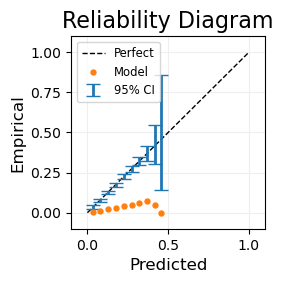

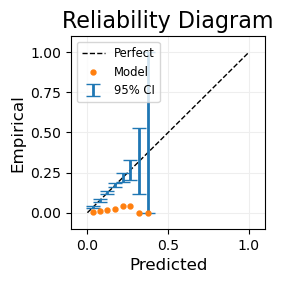

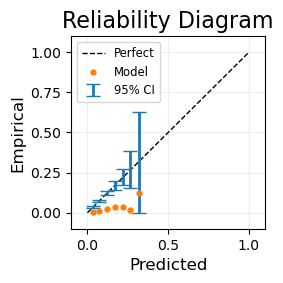

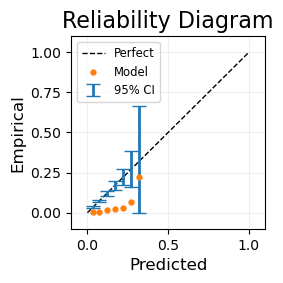

In [45]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'], tp2)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'], tp3)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'], tp4)

In [12]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [191]:
def iso_smote_plot(pos, subneg, p_test, y_test, 
               synth_size, wei):
        
    a, b, loc, scale = beta.fit(pos) # floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    inv_prob = np.sqrt(1/probs)

   # weights = np.where(subgold==1,inv_prob ,1)
    weights = np.where(subgold==1,wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  iso_test) #, error_bars = False)
    return iso_test

In [205]:
w1 = np.mean(gold1)**.5
w2 = np.mean(gold2)**.5
w3 = np.mean(gold3)**.5
w4 = np.mean(gold4)**.5

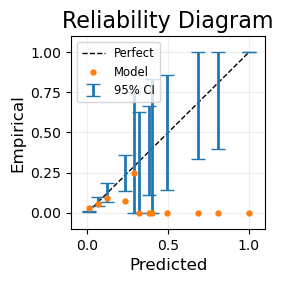

In [230]:
i1_1 = iso_smote_plot(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=10, wei = w1) 

iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)
iso_smote_plot(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
            p_test = tp3, y_test= M_test3['golds'],   synth_size=15, wei = w3)
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

In [252]:
def iso_smote(pos, subneg, p_test, 
               synth_size, wei):
        
   # a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    a, b, loc, scale = beta.fit(pos) # floc=0, fscale=1)

    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    
    weights = np.where(subgold==1, wei ,1)

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold, sample_weight = weights)
    iso_test = iso.predict(    ( p_test) )

    return iso_test

{'pred_probs': array([0.00841694, 0.07321635, 0.12862555, 0.1713211 , 0.22885161,
        0.2601236 , 0.32750275, 0.36945989, 0.4185692 , 0.47797552,
        0.53876899, 0.61873316, 0.78801714, 0.93944522, 1.        ]),
 'emp_probs': array([0.02820646, 0.06105263, 0.09090909, 0.0952381 , 0.03448276,
        0.1       , 0.05263158, 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.5422e+04, 4.7500e+02, 9.9000e+01, 2.1000e+01, 2.9000e+01,
        2.0000e+01, 1.9000e+01, 4.0000e+00, 8.0000e+00, 9.0000e+00,
        4.0000e+00, 9.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00])}

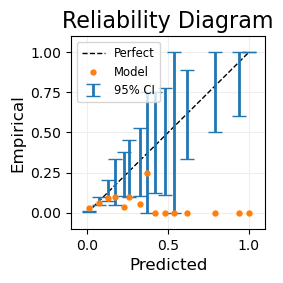

In [254]:
I1 = []
for i in range(20):
    I1.append(iso_smote(pos_1, subneg=np.random.choice(neg_1, 80*sum(gold1)),
            p_test = tp1,   synth_size=10, wei = w1))
IM1 = np.array( [l for l in I1])
MaxI1 = IM1.max(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  MaxI1)


{'pred_probs': array([0.00922764, 0.07228576, 0.12666815, 0.1790147 , 0.28468827,
        0.32462525, 0.38574023, 0.42837766, 0.45476893, 0.53118416,
        0.70225334, 0.75109328, 0.88068115, 0.95131226, 1.        ]),
 'emp_probs': array([0.01427722, 0.03517588, 0.04191617, 0.01666667, 0.0952381 ,
        0.        , 0.        , 0.        , 0.        , 0.0952381 ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'bin_counts': array([1.3448e+04, 3.9800e+02, 1.6700e+02, 6.0000e+01, 4.2000e+01,
        1.7000e+01, 4.0000e+00, 1.8000e+01, 1.4000e+01, 2.1000e+01,
        1.6000e+01, 6.0000e+00, 1.0000e+00, 2.0000e+00, 1.2000e+01])}

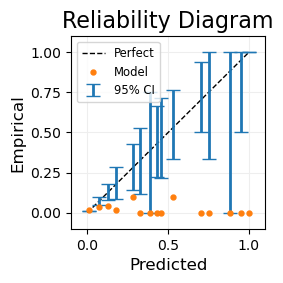

In [259]:
I2 = []
for i in range(20):
    I2.append(iso_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
            p_test = tp2,   synth_size=15, wei = w2))
IM2 = np.array( [l for l in I2])
MaxI2 = IM2.max(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test2['golds'],  MaxI2)


#iso_smote_plot(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
#            p_test = tp2, y_test= M_test2['golds'],   synth_size=15, wei = w2)

In [ ]:
iso_smote_plot(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
            p_test = tp3, y_test= M_test3['golds'],   synth_size=15, wei = w3)
 

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1)

{'pred_probs': array([0.01196373, 0.06950605, 0.11822879, 0.17428218, 0.22796196,
        0.27759347, 0.33274328, 0.38333049, 0.4405085 , 0.46530391,
        0.53468754, 0.57536414, 0.68579317, 0.71378532, 0.78272699,
        0.82701549, 0.85400646, 0.96495172]),
 'emp_probs': array([0.00904015, 0.02951594, 0.04285714, 0.02173913, 0.05      ,
        0.02941176, 0.04651163, 0.        , 0.02222222, 0.11111111,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       ]),
 'bin_counts': array([1.1283e+04, 8.4700e+02, 3.5000e+02, 9.2000e+01, 4.0000e+01,
        6.8000e+01, 4.3000e+01, 3.0000e+00, 4.5000e+01, 9.0000e+00,
        2.1000e+01, 1.0000e+01, 1.0000e+00, 7.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00])}

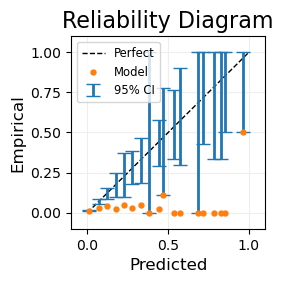

In [267]:
I3 = []
for i in range(20):
    I3.append(iso_smote(pos_3, subneg=np.random.choice(neg_3, 45*sum(gold3)),
            p_test = tp3 ,  synth_size=20, wei = w3))
IM3 = np.array( [l for l in I3])
MaxI3 = IM3.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test3['golds'],  MaxI3)

In [ ]:
iso_smote_plot(pos_4, subneg=np.random.choice(neg_4, 40*sum(gold4)),
            p_test = tp4, y_test= M_test4['golds'],   synth_size=10, wei = w4)

d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
d:\Programs\Anaconda3\envs\pancrisk\Lib\site-packages\scipy\stats\_continuous_distns.py:718: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1)

{'pred_probs': array([0.02344904, 0.0796819 , 0.10589245, 0.20107126, 0.25003619,
        0.38045069]),
 'emp_probs': array([0.0084862, 0.       , 0.       , 1.       , 1.       , 0.       ]),
 'bin_counts': array([1.1666e+04, 5.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        6.0000e+00])}

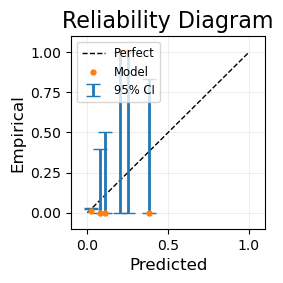

In [270]:
I4 = []
for i in range(100):
    I4.append(iso_smote(pos_4, subneg=np.random.choice(neg_4, 50*sum(gold4)),
            p_test = tp4 ,  synth_size=15, wei = .25))
IM4 = np.array( [l for l in I4])
MaxI4 = IM4.mean(0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test4['golds'],  MaxI4)

array([0.24      , 0.1454112 , 0.3018018 , ..., 0.3018018 , 0.24      ,
       0.42369021])

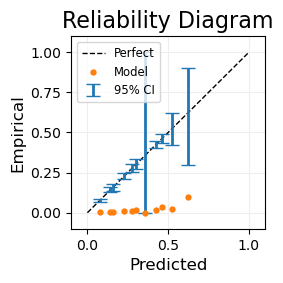

In [36]:
iso_smote(pos_3, subneg=np.random.choice(neg_3, 40*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=15)

array([0.07569721, 0.07224335, 0.16759777, ..., 0.07569721, 0.07569721,
       0.09177215])

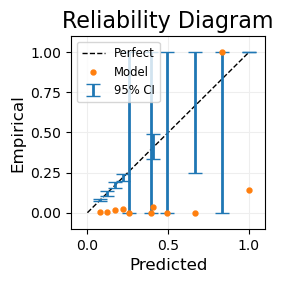

In [42]:
iso_smote(pos_4, subneg=np.random.choice(neg_4, 20*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=3)

In [ ]:
IM1_med = np.median(IM1, axis = 0)
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'],  IM1_med)


In [ ]:
?mli.plot_reliability_diagram